<h1>Score de Crédito utilizando datos hipotecarios</h1>
<h2>Objetivo del proyecto:</h2>

Crear un algoritmo de credit scoring que prediga la posibilidad de que un solicitante de préstamo determinado no cumpla con el pago del préstamo.


<h2>Importar Librerias</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns

<h2>Carga inicial de datos</h2>

In [ ]:
df_original = pd.read_csv("hmeq_dataset.csv")
df_copia = pd.read_csv("hmeq_dataset.csv")

In [ ]:
df_original.head()

,DEFAULT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


<h2>Entendiendo los datos</h2>

In [ ]:
df_original.shape

(5960, 13)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEFAULT  5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
df_original.describe()

,DEFAULT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [ ]:
df_original.columns

Index(['DEFAULT', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

<h2>Análsis de variables</h2>

<p>Analizamos la distribución de la variable target <b>DEFAULT</b>.</p>
<p>Podemos ver que está bastante desbalanceada. Los 0s son alrededor del 80% y los 1s como el 20% del total del dataset.</p>

0    4771
1    1189
Name: DEFAULT, dtype: int64


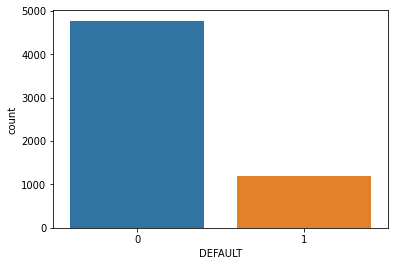

In [ ]:
print(df_original["DEFAULT"].value_counts())
sns.countplot(x='DEFAULT',data=df_original)

<h3>Variables categóricas <b>REASON</b> y <b>JOB</b></h3>

Esta es una variable nominal (variable categórica) y debe ser modificada de manera que podemos usarla en los algortimos.

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64


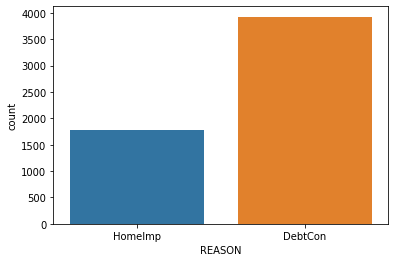

In [ ]:
print(df_original["REASON"].value_counts())
sns.countplot(x='REASON',data=df_original)

También podemos utilizar los odds para tener una representación más precisa de la distribución

De la misma manera que el caso anterior, debemos modificar esta variable de manera que podemos usarla.

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


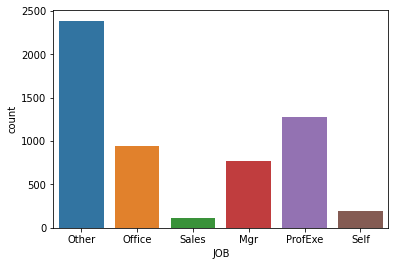

In [ ]:
print(df_original["JOB"].value_counts())
sns.countplot(x='JOB',data=df_original)

<h3>Análisis de la distribución de la variable LOAN</h3>

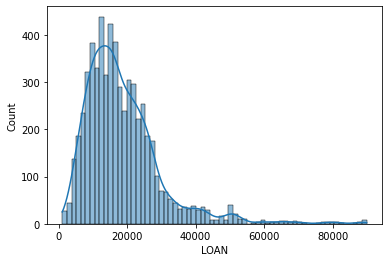

In [ ]:
sns.histplot(data=df_original,x="LOAN", kde=True)

<ul>
    <li>Se puede apreciar que la densidad es alta entre los valores <b>10000-30000</b></li>
    <li>Podemos ver que tiene una asimetría a la derecha (<b>asimétrica positiva</b>)</li>
</ul>

In [ ]:
# Lista de dos estados de la variables DEFAULT
labels = [0, 1]
labels_s = ['Good','Bad']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


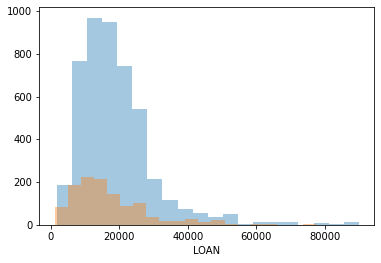

In [ ]:
# Iteramos a través de la variable objetivo DEFAULT (Good, Bad)
for label in labels:
    # Subconjunto de los datos
    subset = df_original[df_original['DEFAULT'] == label]
    # Dibujamos la distribución
    sns.distplot(subset['LOAN'], bins =20, hist = True, kde = False)

<h3>Análisis de la distribución de la variable DEBTINC</h3>

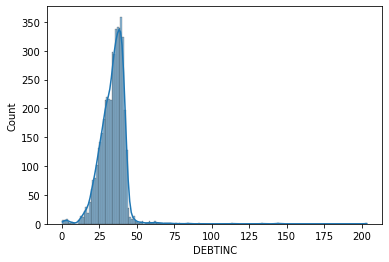

In [ ]:
sns.histplot(data=df_original, x="DEBTINC", kde=True)

<ul>
    <li>Vemos que hay alta densidad entre <b>25 y 50</b></li>
    </ul>

In [ ]:
# Lista de dos estados de la variables DEFAULT
labels = [0, 1]
labels_s = ['Good','Bad']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


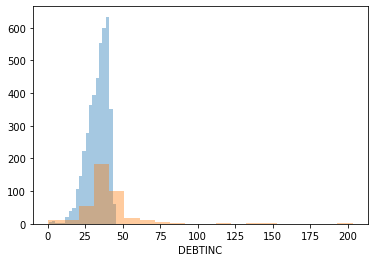

In [ ]:
# Iteramos a través de la variable objetivo DEFAULT (Good, Bad)
for label in labels:
    # Subconjunto de los datos
    subset = df_original[df_original['DEFAULT'] == label]

    # Dibujamos la distribución
    sns.distplot(subset['DEBTINC'], bins =20, hist = True, kde = False,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = labels_s[label])

<h3>Análisis de la distribución de la variable CLAGE</h3>

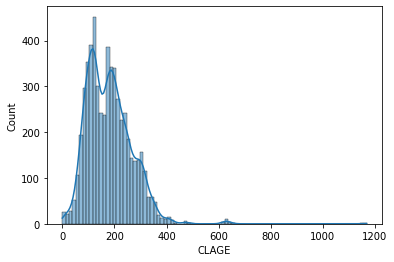

In [ ]:
sns.histplot(data=df_original, x="CLAGE", kde=True)

<ul>
    <li>La densidad es alta entre <b>100-300</b></li>
    <li>Podemos borrar los valores que son <b>>600</b> para obtener mejores resultados</li>
</ul>

In [ ]:
# Lista de dos estados de la variables DEFAULT
labels = [0, 1]
labels_s = ['Good','Bad']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


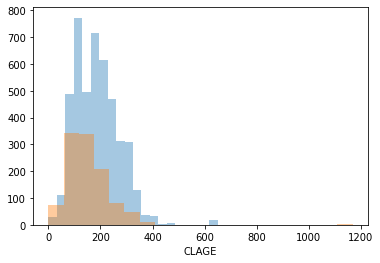

In [ ]:
# Iteramos a través de la variable objetivo DEFAULT (Good, Bad)
for label in labels:
    # Subconjunto de los datos
    subset = df_original[df_original['DEFAULT'] == label]

    # Dibujamos la distribución
    sns.distplot(subset['CLAGE'], bins =20, hist = True, kde = False,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = labels_s[label])

<h3>Análisis de la distribución de la variable CLNO</h3>

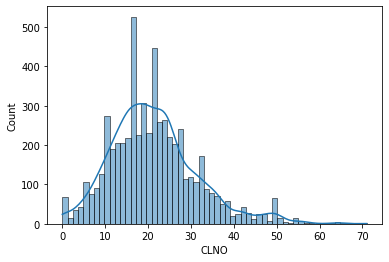

In [ ]:
sns.histplot(data=df_original, x="CLNO", kde=True)

Hasta el momento esta distribución es lo más cercana a una normal.

In [ ]:
#Lista de dos estados de la variables DEFAULT
labels = [0, 1]
labels_s = ['Good','Bad']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


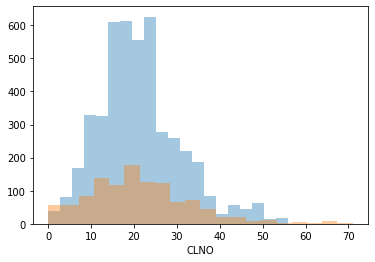

In [ ]:
# Iteramos a través de la variable objetivo DEFAULT (Good, Bad)
for label in labels:
    # Subconjunto de los datos
    subset = df_original[df_original['DEFAULT'] == label]

    # Dibujamos la distribución
    sns.distplot(subset['CLNO'], bins =20, hist = True, kde = False,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = labels_s[label])

<h3>Análisis de la distribución de la variable VALUE</h3>

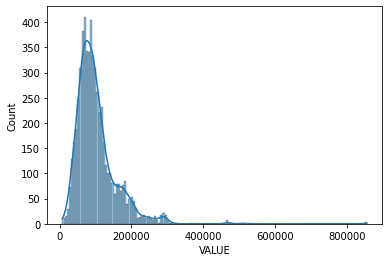

In [ ]:
sns.histplot(data=df_original, x="VALUE", kde=True)

<ul>
    <li>La densidad es alta en más o menos <b>80000-100000</b></li>
    <li>Tenemos muchos valores que son <b>>400000</b> que son más altos comparados con la media. Podemos eliminarlos.</li>
</ul>

In [ ]:
# Lista de dos estados de la variables DEFAULT
labels = [0, 1]
labels_s = ['Good','Bad']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


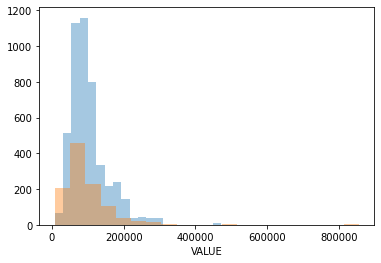

In [ ]:
# Iteramos a través de la variable objetivo DEFAULT (Good, Bad)
for label in labels:
    # Subconjunto de los datos
    subset = df_original[df_original['DEFAULT'] == label]

    # Dibujamos la distribución
    sns.distplot(subset['VALUE'], bins =20, hist = True, kde = False)

<h3>Análisis de la distribución de la variable MORTDUE</h3>

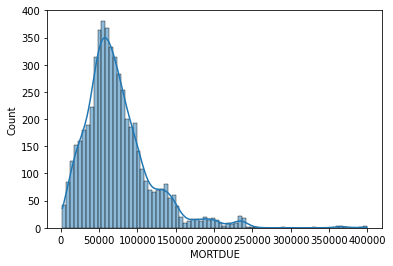

In [ ]:
sns.histplot(data=df_original, x="MORTDUE", kde=True)

<ul>
    <li>La densidad es alta entre <b>40000-100000</b></li>
    <li>Podemos eliminar los valores que sean <b>> 300000</b></li>
</ul>

In [ ]:
# Lista de dos estados de la variables DEFAULT
labels = [0, 1]
labels_s = ['Good','Bad']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


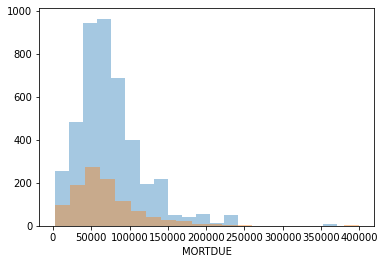

In [ ]:
# Iteramos a través de la variable objetivo DEFAULT (Good, Bad)
for label in labels:
    # Subconjunto de los datos
    subset = df_original[df_original['DEFAULT'] == label]

    # Dibujamos la distribución
    sns.distplot(subset['MORTDUE'], bins =20, hist = True, kde = False,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = labels_s[label])

<h3>Análisis de la distribución de la variable YOJ</h3>

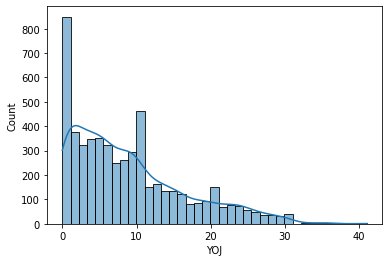

In [ ]:
sns.histplot(data=df_original, x="YOJ", kde=True)

El análisis podría tener mucho sesgo si trabajamos la variable tomando encuenta su distribución. Sería mejor si modificamos esta variable para disminuir la asimetría

<h3>Análisis de la variable DEROG</h3>

In [ ]:
df_original["DEROG"].value_counts()

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

Informes despectivos (Derogatory incidents) fueron reportados solo en pocos casos. Lo que haremos es crear una <b>variable binaria</b> en donde 1 significará que al menos un incidente fue reportado y 0 que no fue reportado ninguno. Esto podría ser de mayor utilidad.

<h3>Análisis de la variable DELINQ</h3>

In [ ]:
df_original["DELINQ"].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

El mismo caso que el anterior. Crearemos una <b>variable binaria</b> para el caso de la variable que representa al número de lineas de crédito morosas.

<h3>Análisis de la variable NINQ</h3>

In [ ]:
df_original["NINQ"].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

La distribución en el caso de la variable <b>NINQ</b>, que hace referencia a las lineas de crédito más recientes, tiene mayor concentración en los primeros 5 valores.

<h4>Conclusiones:</h4>
<ul>
    <li><b>DEBTINC</b> tiene un alto número de datos faltantes. Esto será lo primero que atenderemos en la siguiente sección.</li>
    <li>La variable <b>YOJ</b> está sesgada y podría ser modificada para disminuirlo.</li>
    <li>Las variables nominales: <b>JOB</b> y <b>REASON</b> deben ser modificadas de tal forma que podamos usarlas para el modelo. Debemos analizar si construimos variables binarias para estos dos casos.</li>
    <li><b>DELINQ</b>, <b>DEROG</b> puede ser divididas en 2 clases para crear nuevas variables binarias.</li>
    <li><b>VALUE</b>, <b>MORTDUE</b>, <b>CLAGE</b>, <b>DEBTINC</b> pueden ser truncadas al final, es decir, que los valores que son muy altos se establecerán en un valor inferior seleccionado. Es un tratado que se le puede dar a los <b>Outliers</b>.</li>
</ul>

<h2>Imputación de Variables de Entrada</h2>

In [ ]:
df_original.isnull().sum()

DEFAULT       0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

<h4>Observaciones:</h4>
<ol>
    <li>Exceptuando el caso de <b>DEBTINC</b>, en todos los otros casos solo pocas valores no fueron reportados.</li>
    <li>Para imputar valores faltantes podemos pensar algunas ideas como:</li>
        <ol>
            <li>En el caso de variables nominales, reemplazarlas con la clase mayor.</li>
            <li>En el caso de variables numéricas como <b>DEROG</b> y <b>DELINQ</b>, muchos de los casos son 0. Podemos reemplazar éstas con la clase mayor.</li>
            <li>En el caso de otras entradas numéricas, podemos reemplazarlas con la mediana o media sin modificar mucho. En este notebook vamos a reemplarlas con la media de la columna respectiva.</li>
        </ol>
</ol>

<h3>Variables nominales</h3>
Reemplazamos usando la clase mayoritaría:
<ul>
    <li>La clase mayoritaría para la variable <b>JOB</b> es <b>Other</b></li>
    <li>La clase mayoritaría para la variable <b>REASON</b> es <b>DebtCon</b></li>
</ul>

In [ ]:
df_original["REASON"].fillna(value = "DebtCon",inplace = True)
df_original["JOB"].fillna(value = "Other",inplace = True)

In [ ]:
df_original["DEROG"].fillna(value = 0, inplace = True)
df_original["DELINQ"].fillna(value = 0, inplace = True)

<h3>Variables numéricas</h3>
Reemplazamos los vacios con la media de cada clase

In [ ]:
df_original.fillna(value = df_original.mean(),inplace = True)

In [ ]:
df_original.head()

,DEFAULT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


Finalmente, validamos que ya no exite ningún valor nulo.

In [ ]:
df_original.isnull().sum()

DEFAULT    0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEFAULT  5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
df_original.head()

,DEFAULT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


<h2>Aplicando el modelo en la data luego de la imputación</h2>

<ul>
    <li>Aplicando la clasificación básica en los datos luego del reemplazo/imputación. Vamos a validar el performance aplicando el algoritmos Árboles de decisión.</li>
    <li>Antes de aplicar el modelo, los datos son divididos en dos conjuntos, <b>entrenamiento</b> y <b>pruebas</b> con el ratio de 2:1 esto es, <b>33%</b> para los datos de prueba y <b>67%</b> para los datos de entrenamiento.</li>
    <li>Y también tomando todas las columnas exceptuando <b>JOB</b>, <b>REASON</b> como características de entrada (ya que ellas son características nominales, ellas deberan ser transformadas en otras variables para ser usables lo cual es tomado en cuenta en la siguientes sección)</li>
</ul>




<h3>Usando árboles de decisión</h3>

Esta función es necesaria para las gráficas más adelante

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización puede ser aplicada configurando `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


accuracy score :  0.8871377732587697
f1 score :  0.7124352331606216
precision score :  0.7513661202185792
recall score :  0.6773399014778325
Mean ROC AUC: 0.873
Matriz de confusión sin normalización
[[1470   91]
 [ 131  275]]


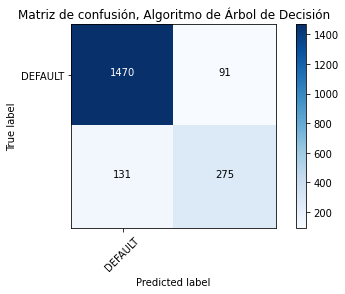

'images/DEFAULT.pdf'

<Figure size 432x288 with 0 Axes>

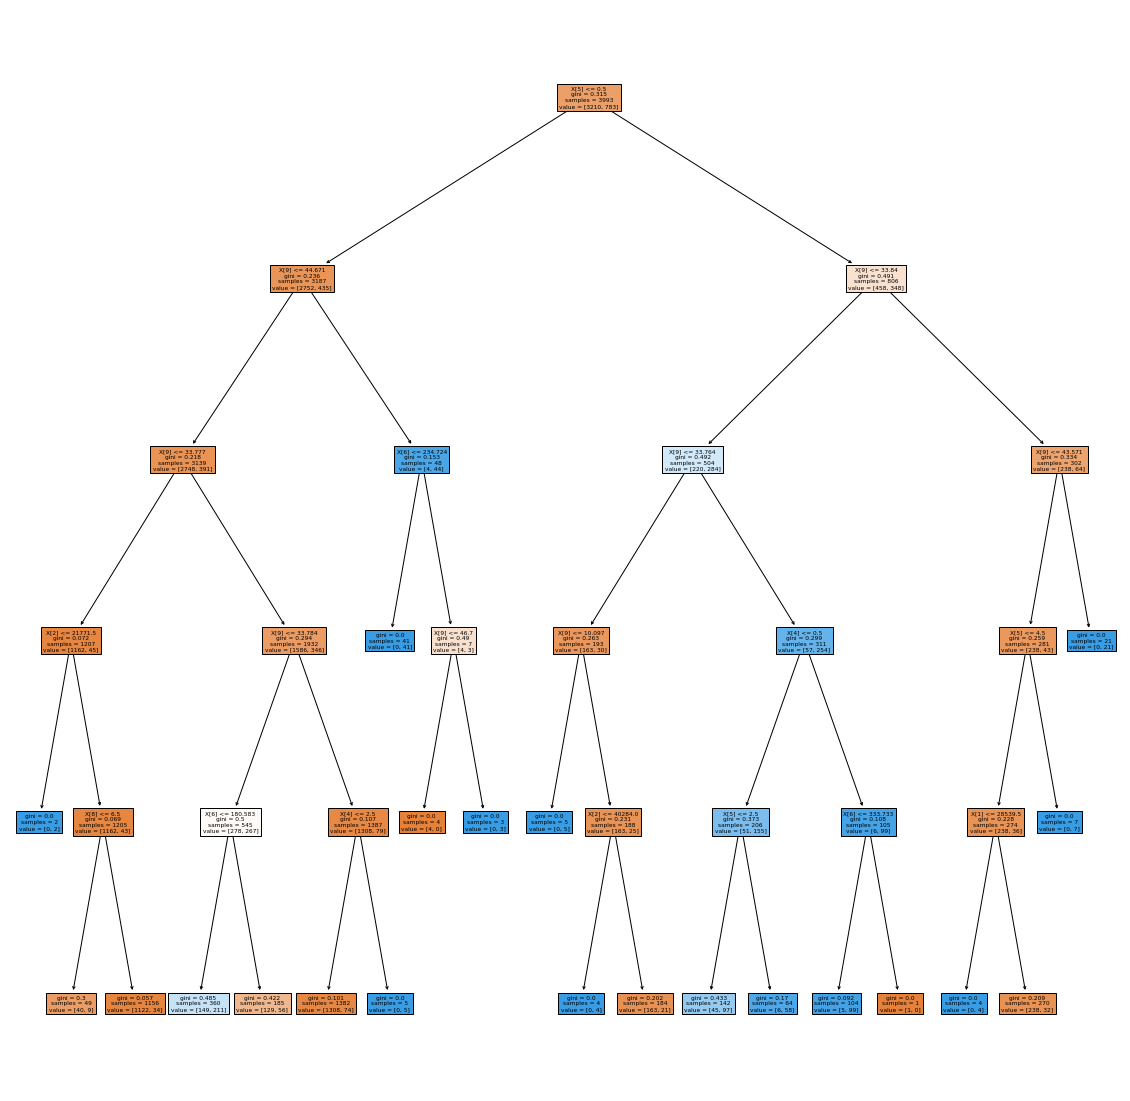

In [ ]:
# Importamos los módulos requeridos
import matplotlib.pyplot as plt
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree._export import plot_tree
from sklearn import tree

#Removiendo las características BAD,JOB,REASON del conjunto de características de entrada
x_basic = df_original.drop(columns=["DEFAULT","JOB","REASON"])
y = df_original["DEFAULT"]

#Dividiendo los datos en conjuntos de prueba y entrenamiento
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 5
# Entrenando el modelo básico de árboles de decisión con el conjunto de entrenamiento
dectree_basic.fit(x_basic_tr,y_tr)

# Prediciendo el output de los casos de prueba usando el modelo antes creado
y_pre = dectree_basic.predict(x_basic_te)

#Validando el modelo usando varias métricas de Performance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="binary")
p1 = precision_score(y_te, y_pre, average="binary")
r1 = recall_score(y_te, y_pre, average="binary")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
# proceso de evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar modelo
scores = cross_val_score(dectree_basic, x_basic, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# Area under curve
u1 = mean(scores)
print('Mean ROC AUC: %.3f' % u1)
# Calculando matriz de confusión para el modelo anterior

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Ploteando Matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["DEFAULT"],
                      title='Matriz de confusión, Algoritmo de Árbol de Decisión')

plt.show()

plt.figure()
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(dectree_basic, filled=True)
plt.savefig('images/decisiontree.png')
plt.savefig('images/tree.eps',format='eps',bbox_inches = "tight")

#plt.show()
import graphviz
dot_data = tree.export_graphviz(dectree_basic, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("images/DEFAULT")

In [ ]:
x_basic.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0000,39025.000000,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1300,70053.0000,68400.000000,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1500,13500.0000,16700.000000,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1500,73760.8172,101776.048741,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,1700,97800.0000,112000.000000,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


<h2>Alguna discusión sobre las métricas de Performance</h2>

- Generalmente se puede usar la prueba de Accuracy para evaluar el modelo. Pero en este caso, solo usando la Clase Mayoritaria (0) para predecir el output nos daría alta Accuracy (79.2%). Pero terminariamos precidiendo todos los 1s como 0s.

- Por lo tanto, otras métricas de Performance deben ser usadas para evaluar el modelo. Y estas serían:
    <ul>
        <li>F1 score: Media ponderada del Recall y Precisión</li>
        <li>Recall: (TP/TP+FN)</li>
        <li>Precision : (TP/TP+FP)</li>
    </ul>
    
- TP es true positive, FN es false negative, FP es false positive

- Aqui queremos que decrezca el número de Falsos Negativos es decir, predecimos que el crédito será pagado pero en realidad es fraudulento. Para decrecer FN implica incrementar el Recall, Por lo tanto, RECALL será la métrica de Performance perfecta para evaluar este modelo.

- Precisión podría decrecer en el proceso de incrementar el recall pero está bien predecir algunos False Positives extras.

- Podemos también re-muestrear los datos (volveremos a eso en el final)

<h2>Transformación e Ingeniería de características</h2>
<ul>
    <li>Antes de la selección de características, como discutimos en la sección de "Análisis descriptivo" necesitamos transformar algunas variables para mejorar la predictibilidad.</li>
    <li>Hemos transformado todo el conjunto de datos, no solo el conjunto de entrenamiento.</li>
</ul>

<h3>Completando las características CLAGE, VALUE, MORTDUE, DEBTINC</h3>

In [ ]:
df_original.loc[df_original["CLAGE"]>=600,"CLAGE"] = 600
df_original.loc[df_original["VALUE"]>=400000,"VALUE"] = 400000
df_original.loc[df_original["MORTDUE"]>=300000,"MORTDUE"] = 300000
df_original.loc[df_original["DEBTINC"]>=100,"DEBTINC"] = 100

<h3>Creando nuevas variables binarias B_DEROG,B_DELINQ de DEROG,DELINQ</h3>

In [ ]:
df_original["B_DEROG"] = (df_original["DEROG"]>=1)*1
df_original["B_DELINQ"] = (df_original["DELINQ"]>=1)*1

<h3>Transformando las variables JOB y REASON</h3>

In [ ]:
df_original["JOB"].unique()

array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'], dtype=object)

In [ ]:
df_original["REASON"].unique()

array(['HomeImp', 'DebtCon'], dtype=object)

Necesitamos convertir las características nominales JOB y REASON a una forma usable, y removerlas de la tabla de datos.

In [ ]:
df_original["REASON_1"] = (df_original["REASON"] == "HomeImp")*1
df_original["REASON_2"] = (df_original["REASON"] != "HomeImp")*1
df_original["JOB_1"] = (df_original["JOB"]=="Other")*1
df_original["JOB_2"] = (df_original["JOB"]=="Office")*1
df_original["JOB_3"] = (df_original["JOB"]=="Sales")*1
df_original["JOB_4"] = (df_original["JOB"]=="Mgr")*1
df_original["JOB_5"] = (df_original["JOB"]=="ProfExe")*1
df_original["JOB_6"] = (df_original["JOB"]=="Self")*1
df_original.drop(["JOB","REASON"],axis = 1,inplace = True)

<h3>Transformando las variables YOJ</h3>
Necesitamos decrecer el sesgo de la característica YOJ. Para esto podemos aplicar log de YOJ pero desde que algunas de ellos son 0, usaremos log(YOJ+constant).

In [ ]:
df_original["YOJ"] = df_original["YOJ"].apply(lambda t : np.log(t+1))

In [ ]:
df_original.head()

,DEFAULT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,B_DEROG,B_DELINQ,REASON_1,REASON_2,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
0,1,1100,25860.0000,39025.000000,2.442347,0.0,0.0,94.366667,1.000000,9.000000,33.779915,0,0,1,0,1,0,0,0,0,0
1,1,1300,70053.0000,68400.000000,2.079442,0.0,2.0,121.833333,0.000000,14.000000,33.779915,0,1,1,0,1,0,0,0,0,0
2,1,1500,13500.0000,16700.000000,1.609438,0.0,0.0,149.466667,1.000000,10.000000,33.779915,0,0,1,0,1,0,0,0,0,0
3,1,1500,73760.8172,101776.048741,2.294782,0.0,0.0,179.766275,1.186055,21.296096,33.779915,0,0,0,1,1,0,0,0,0,0
4,0,1700,97800.0000,112000.000000,1.386294,0.0,0.0,93.333333,0.000000,14.000000,33.779915,0,0,1,0,0,1,0,0,0,0


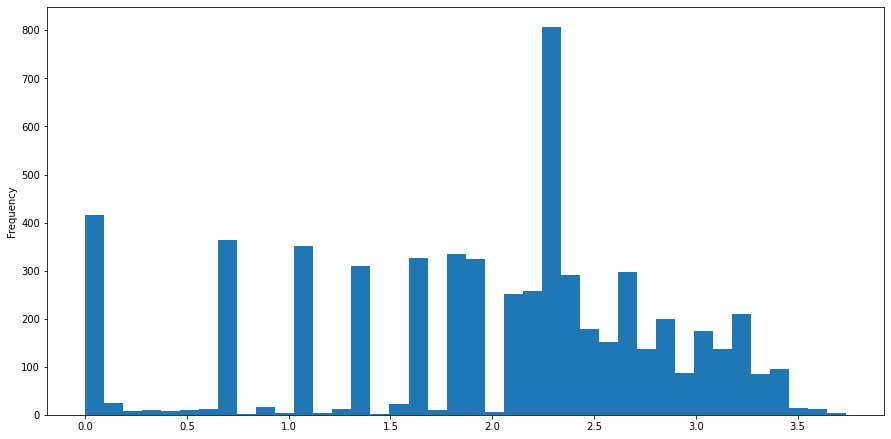

In [ ]:
df_original["YOJ"].plot.hist(bins=40,figsize=(15,7.5))

In [ ]:
# Lista de dos estados de la variables DEFAULT
labels = [0, 1]
#labels_s = ['Good','Bad']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0
1


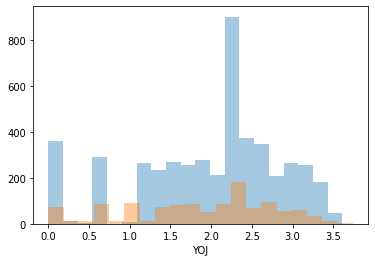

In [ ]:
# Iteramos a través de la variable objetivo DEFAULT (Good, Bad)
for label in labels:
    # Subconjunto de los datos
    subset = df_original[df_original['DEFAULT'] == label]

    # Dibujamos la distribución
    sns.distplot(subset['YOJ'], bins =20, hist = True, kde = False)
    print(label)


<h2>Clasificador de árbol de decisión usando características transformadas</2>

accuracy score :  0.8866293848500254
f1 score :  0.7107652399481192
precision score :  0.7506849315068493
recall score :  0.6748768472906403
Mean ROC AUC: 0.873

Matriz de confusión sin normalización
[[1470   91]
 [ 132  274]]


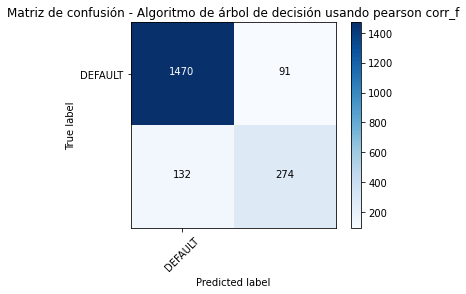

In [ ]:
x = df_original.drop(columns=["DEFAULT"])
y = df_original["DEFAULT"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.33,random_state=1)

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 5
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="binary")
p2 = precision_score(y_te, y_pre, average="binary")
r2 = recall_score(y_te, y_pre, average="binary")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)
# proceso de evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar modelo
scores = cross_val_score(clf_tree, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# Area under curve
u2 = mean(scores)
print('Mean ROC AUC: %.3f' % u2)
print("")
# Calculando matriz de confusión para el modelo anterior

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plotear la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["DEFAULT"],
title='Matriz de confusión - Algoritmo de árbol de decisión usando pearson corr_f')

plt.show()

#plt.figure()
#fig, ax = plt.subplots(figsize=(20, 20))
#plot_tree(dectree_basic, filled=True)

#plt.show()
import graphviz
#dot_data = tree.export_graphviz(dectree_basic, out_file=None)
#graph = graphviz.Source(dot_data)
#graph.render("images/DEFAULT_TRANSFORMED_FEATURES")

<h2>Balanceamos las clases</h2>

In [ ]:
# definimos los pesos de cada clase
weights = {0:0.2, 1:0.8}

accuracy score :  0.8718861209964412
f1 score :  0.7014218009478673
precision score :  0.6757990867579908
recall score :  0.729064039408867
Mean ROC AUC: 0.883

Matriz de confusión sin normalización
[[1419  142]
 [ 110  296]]


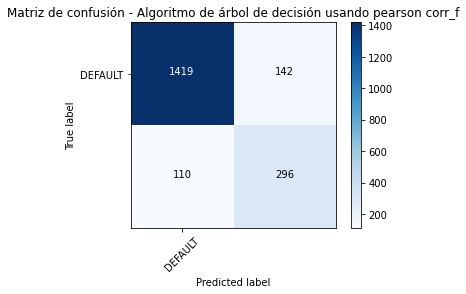

In [ ]:
x = df_original.drop(columns=["DEFAULT"])
y = df_original["DEFAULT"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.33,random_state=1)

clf_tree=DecisionTreeClassifier(class_weight=weights)
clf_tree.max_depth = 5
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a3 = accuracy_score(y_te,y_pre)
f3 = f1_score(y_te, y_pre, average="binary")
p3 = precision_score(y_te, y_pre, average="binary")
r3 = recall_score(y_te, y_pre, average="binary")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)
# proceso de evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar modelo
scores = cross_val_score(clf_tree, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# Area under curve
u3 = mean(scores)
print('Mean ROC AUC: %.3f' % u3)
print("")
# Calculando matriz de confusión para el modelo anterior

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plotear la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["DEFAULT"],
title='Matriz de confusión - Algoritmo de árbol de decisión usando pearson corr_f')

plt.show()

#plt.figure()
#fig, ax = plt.subplots(figsize=(20, 20))
#plot_tree(dectree_basic, filled=True)

#plt.show()
import graphviz
#dot_data = tree.export_graphviz(dectree_basic, out_file=None)
#graph = graphviz.Source(dot_data)
#graph.render("images/DEFAULT_BALANCED_CLASSES")

<h2>Comparando Modelos</h2>

In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Decision Tree', 'Decision Tree'],
    'Feature Selection Method' : ['None','With Transformed Features','With Balanced Classes'],
    'Accuracy Score': [a1,a2,a3],
    'Recall Score' : [r1,r2,r3],
    'F1 Score' : [f1,f2,f3],
    'Precision Score' : [p1,p2,p3],
    'AUC' : [u1,u2,u3]
})

In [ ]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score,AUC
0,Decision Tree,None,0.887138,0.677340,0.712435,0.751366,0.872820
1,Decision Tree,With Transformed Features,0.886629,0.674877,0.710765,0.750685,0.872640
2,Decision Tree,With Balanced Classes,0.871886,0.729064,0.701422,0.675799,0.882533
